In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [40]:
sns.set_theme(style='whitegrid')

In [41]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
submission_df = pd.read_csv('../data/gender_submission.csv')

In [42]:
submission_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [43]:
print("Train shape:", train_df.shape)  
print("\nTest shape:", test_df.shape)  
print("\nSubmission shape:", submission_df.shape)  

Train shape: (891, 12)

Test shape: (418, 11)

Submission shape: (418, 2)


In [44]:
print("\nTrain info:")
print(train_df.info())


Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [45]:
print("\nTest info:")
print(test_df.info())


Test info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


In [46]:
print("\nTrain describe:")
print(train_df.describe())


Train describe:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [47]:
print("\nTest describe:")
print(test_df.describe())


Test describe:
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


In [48]:
print("\nПропуски в train:")
print(train_df.isnull().sum()) 


Пропуски в train:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [49]:
print("\nПропуски в test:")
print(test_df.isnull().sum())  


Пропуски в test:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [50]:
print("\nДубликаты в train:", train_df.duplicated().sum())  
print("\nДубликаты в test:", test_df.duplicated().sum())  


Дубликаты в train: 0

Дубликаты в test: 0


<h2>Распределение возраста с KDE</h2>

KDE — это сглаженная кривая, которая аппроксимирует плотность распределения данных.<br>
'density': Нормализованная плотность, где площадь под гистограммой равна 1

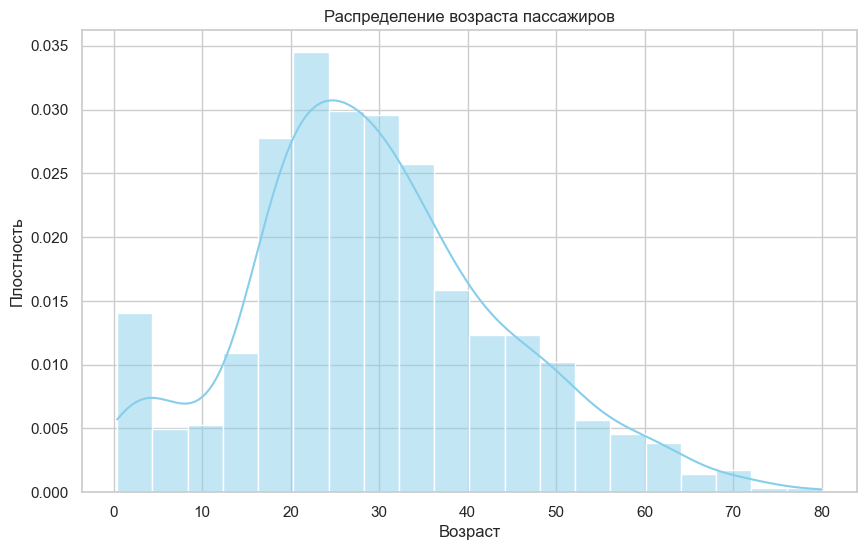

In [51]:
plt.figure(figsize = (10, 6))
sns.histplot(train_df['Age'].dropna(), bins = 20, kde = True, color = 'skyblue', stat='density')
plt.title('Распределение возраста пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Плостность')
plt.savefig('../figures/age_distribution.png' )
plt.show()

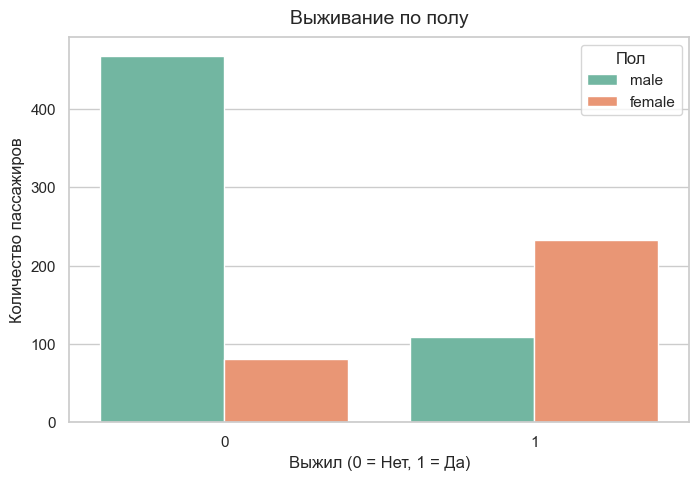

In [52]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Sex', data=train_df, palette='Set2')
plt.title('Выживание по полу', fontsize=14, pad=10)
plt.xlabel('Выжил (0 = Нет, 1 = Да)', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.legend(title='Пол', loc='upper right')
plt.savefig('../figures/survival_by_sex.png', dpi=300, bbox_inches='tight')
plt.show()

In [53]:
sex_survive_counts = train_df.groupby(['Sex', 'Survived']).size().unstack()
print(sex_survive_counts)

Survived    0    1
Sex               
female     81  233
male      468  109


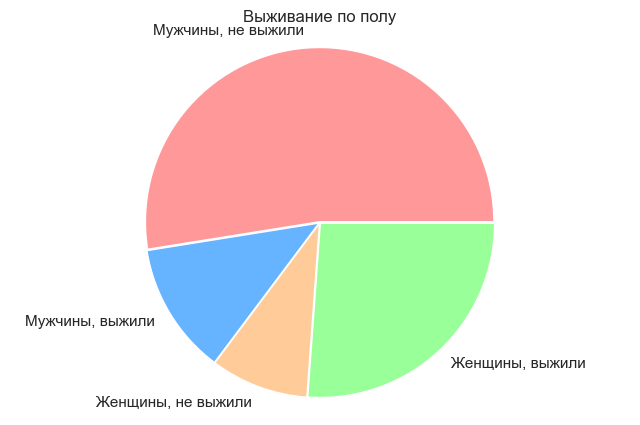

In [54]:
labels = ['Мужчины, не выжили', 'Мужчины, выжили', 'Женщины, не выжили', 'Женщины, выжили']
sizes = [
    sex_survive_counts.loc['male', 0],
    sex_survive_counts.loc['male', 1],
    sex_survive_counts.loc['female', 0],
    sex_survive_counts.loc['female', 1]
]

colors = ['#ff9999', '#66b3ff', '#ffcc99', '#99ff99']  # Цвета для контраста
explode = (0.005, 0.005, 0.005, 0.005)  # Отступ для каждого сектора

plt.figure(figsize=(8,5))
plt.pie(sizes, explode=explode, colors=colors, labels=labels)
plt.axis('equal')
plt.title('Выживание по полу')
plt.show()

In [55]:
train_df.groupby('Sex')['Survived'].mean() * 100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

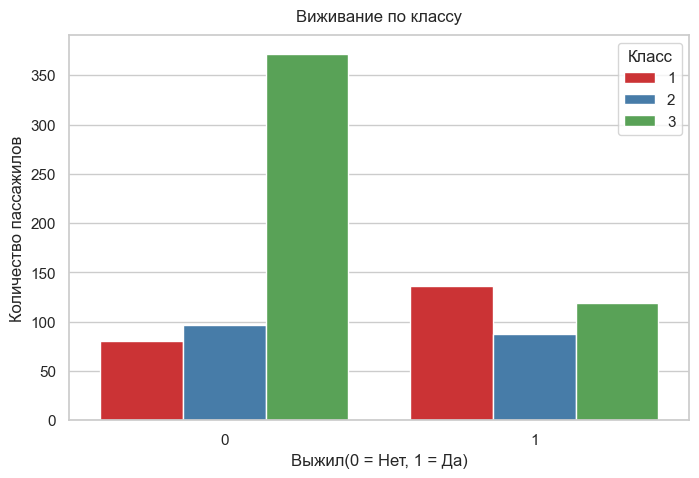

In [56]:
plt.figure(figsize=(8,5))
sns.countplot(x='Survived', hue='Pclass', data=train_df, palette='Set1')
plt.title('Виживание по классу', pad=10)
plt.xlabel('Выжил(0 = Нет, 1 = Да)')
plt.ylabel('Количество пассажилов')
plt.legend(title = 'Класс', loc = 'upper right')
plt.savefig('../figures/survival_by_class.png')
plt.show()

Корреляционная матрица числовых признаков

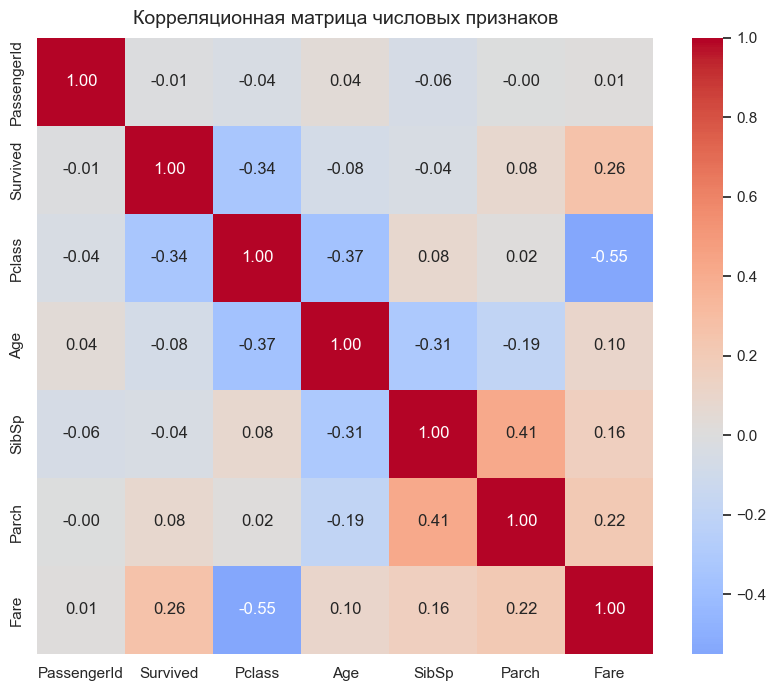

In [57]:
plt.figure(figsize=(10,8))
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix=train_df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', center=0, fmt='.2f', square=True)
plt.title('Корреляционная матрица числовых признаков', fontsize=14, pad=10)
plt.savefig('../figures/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [58]:
print('Средний возраст:', train_df['Age'].mean())
print('Эксцесс по возрасту:', train_df['Age'].kurt())
print('Ассиметрия:', train_df['Age'].skew())

Средний возраст: 29.69911764705882
Эксцесс по возрасту: 0.17827415364210353
Ассиметрия: 0.38910778230082704


Анализ для SibSp (количство братьев, сестёр, супругов)

Частота значений SibSp:
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


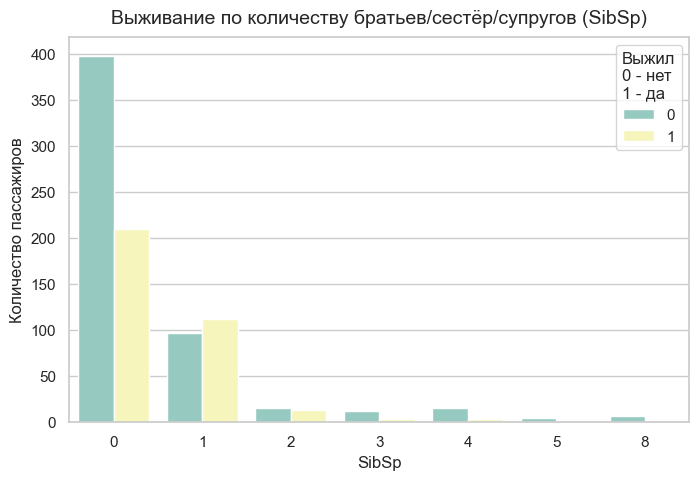

In [59]:
print('Частота значений SibSp:')
print(train_df['SibSp'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(x='SibSp', hue = 'Survived', data = train_df, palette = 'Set3')
plt.title('Выживание по количеству братьев/сестёр/супругов (SibSp)', fontsize=14, pad=10)
plt.xlabel('SibSp', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.legend(title='Выжил\n0 - нет\n1 - да', loc='upper right')
plt.savefig('../figures/survival_by_sibsp.png', dpi=300, bbox_inches='tight')
plt.show()

Анализ столбика Parch(количество детей и/или родителей)

In [60]:
print(train_df['Parch'].value_counts())

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [61]:
print(train_df['Parch'].isna().sum())

0


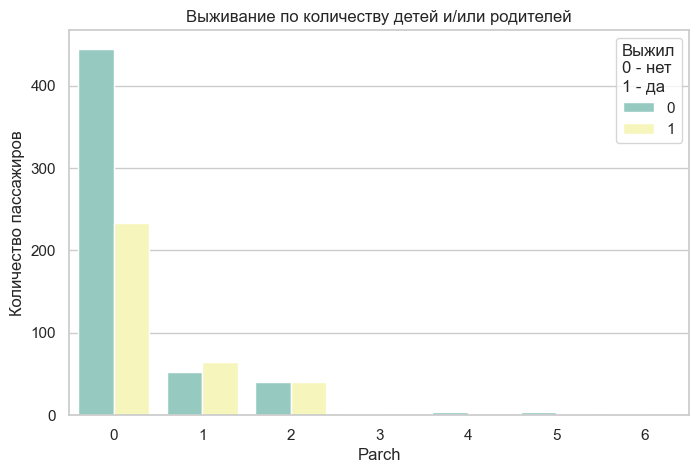

In [62]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'Parch', hue='Survived', data = train_df, palette='Set3')
plt.title('Выживание по количеству детей и/или родителей')
plt.xlabel('Parch')
plt.ylabel('Количество пассажиров')
plt.legend(title='Выжил\n0 - нет\n1 - да', loc='upper right')
plt.show()

Анализ цены билетов

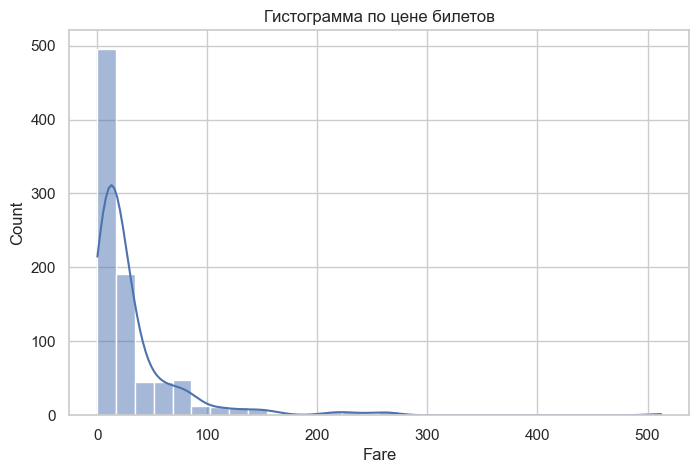

In [63]:
plt.figure(figsize=(8,5))
sns.histplot(train_df['Fare'], bins = 30, kde= True)
plt.title('Гистограмма по цене билетов')
plt.show()

Исследую корреляцию между Fare и Pclass. Ещё из матрицы корреляции видно, что есть связь, но для тренировки проверю ещё раз

In [64]:
x = train_df['Fare']
y = train_df['Pclass']

r, p = stats.pearsonr(x, y)
print('Корреляция:', r)
print('P-value:', p)

Корреляция: -0.5494996199439078
P-value: 1.967386173422685e-71


Отрицательная корриляция - обратная связь, что в целом логично. Чем выше цена билета, тем меньше номер класса. P-value - это верлятность допустить ошибку первого рода (вероятность того, что связь случайна). Но здесь очевидно она не случайна

Доверительный интервал

In [66]:
z = np.arctanh(r)
n = len(x)
se_z = 1 / np.sqrt(n - 3)
z_critical = 1.96
ci_lower_z = z - z_critical * se_z
ci_upper_z = z + z_critical * se_z
ci_upper_r = np.tanh(ci_upper_z)
ci_lower_r = np.tanh(ci_lower_z)
print(f'Доверительный интервал: [{ci_lower_r:.4f} , {ci_upper_r:.4f}]')

Доверительный интервал: [-0.5937 , -0.5019]


График рассеяния 

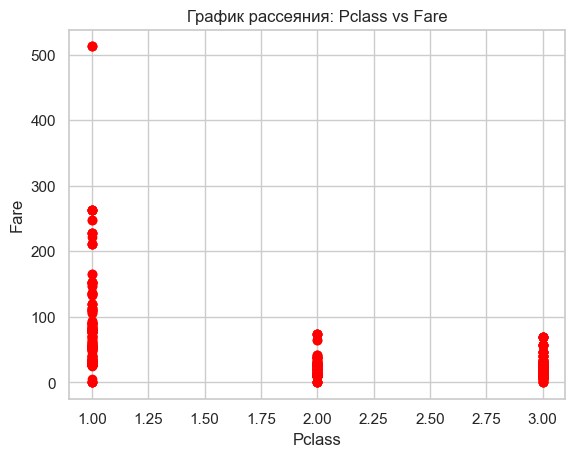

In [69]:
plt.scatter(train_df['Pclass'], train_df['Fare'], color = 'red')
plt.title('График рассеяния: Pclass vs Fare')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

Анализ посадки(Embarked)

In [71]:
train_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

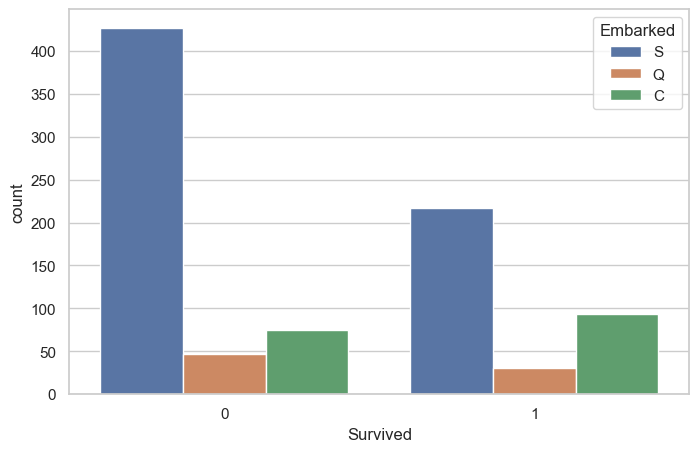

In [75]:
plt.figure(figsize=(8, 5))
sns.countplot(x = 'Survived', hue='Embarked', data=train_df)

plt.show()

Добавлю новые признаки 

In [83]:
train_df['FamilySize'] = train_df['Parch'] + train_df['SibSp'] + 1
train_df['Age'] = train_df['Age'].fillna(train_df.groupby(['Pclass', 'Sex'])['Age'].transform('median'))
train_df['Cabin'] = train_df['Cabin'].fillna(train_df['Embarked'].mode()[0])
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [84]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
FamilySize     0
dtype: int64

Подготовка данных к моделированию

Шаг 1. Кодирование категориальных переменных (one-hot encoding)

In [85]:
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'],drop_first=True)

Шаг 2. Удаление ненужных столбцов

In [87]:
columns_to_drop = ['Name', 'Ticket', 'Cabin']
train_df = train_df.drop(columns=columns_to_drop)

Шаг 3. Проверка пропусков

In [88]:
print(train_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
FamilySize     0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64


Шаг 4. Сохранение обработанного DataFrame

In [89]:
train_df.to_csv('../data/train_processed.csv', index=False)
print("\nОбработанный DataFrame сохранён в '../data/train_processed.csv'")


Обработанный DataFrame сохранён в '../data/train_processed.csv'


In [90]:
print("\nОставленные признаки:")
print(train_df.columns.tolist())


Оставленные признаки:
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Sex_male', 'Embarked_Q', 'Embarked_S']
